In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ SHAP shape: (571, 15, 2)
✅ X_test shape: (571, 15)
📊 SHAP bar plot saved to: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/shap_feature_importance_bar_RF_Forest.png
✅ SHAP feature importance saved to: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/shap_feature_importance_RF_Forest.csv


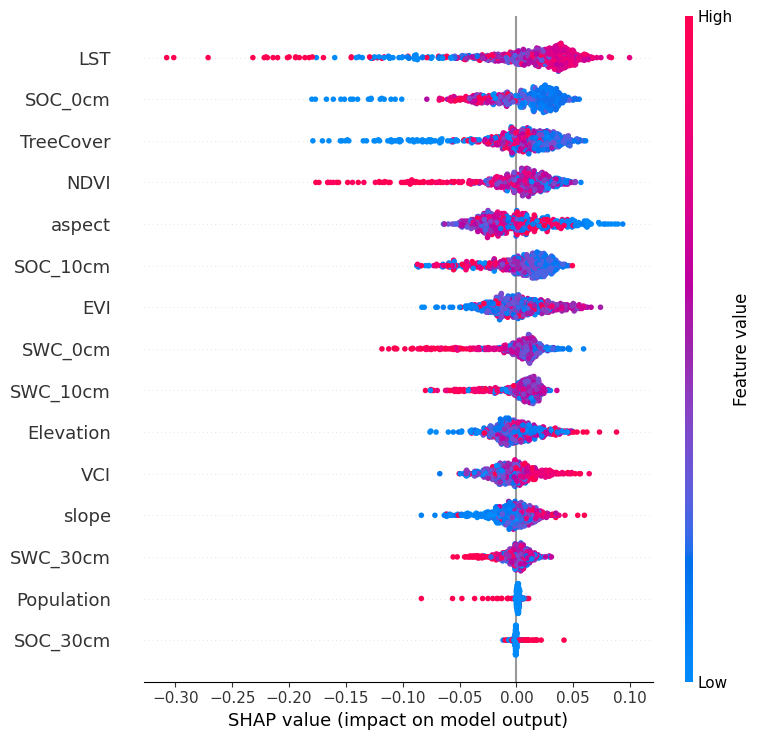

🐝 SHAP summary plot saved successfully!


<Figure size 640x480 with 0 Axes>

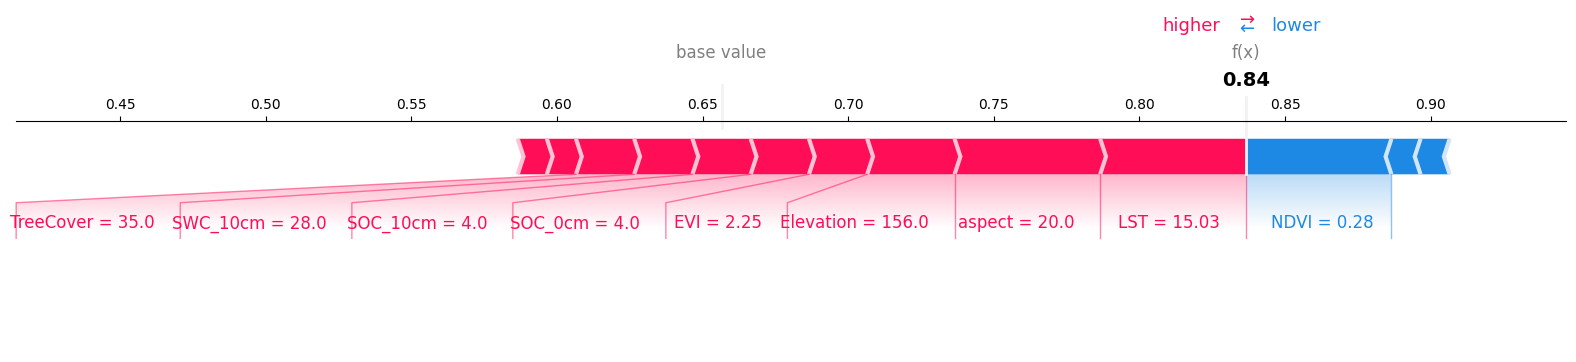

📌 Force plot saved: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/SHAP_ForcePlots_Forest/shap_force_plot_sample_1.png


<Figure size 640x480 with 0 Axes>

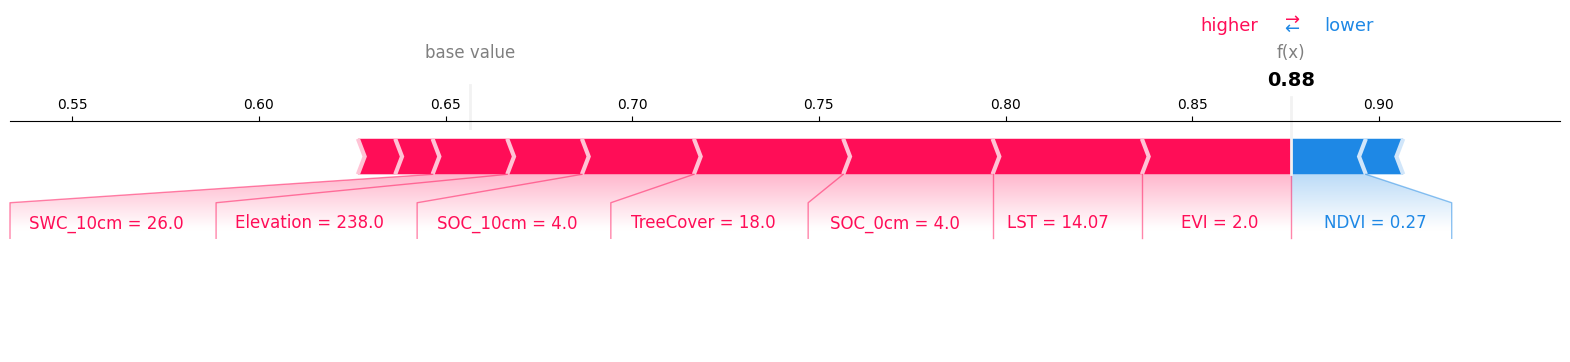

📌 Force plot saved: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/SHAP_ForcePlots_Forest/shap_force_plot_sample_2.png


<Figure size 640x480 with 0 Axes>

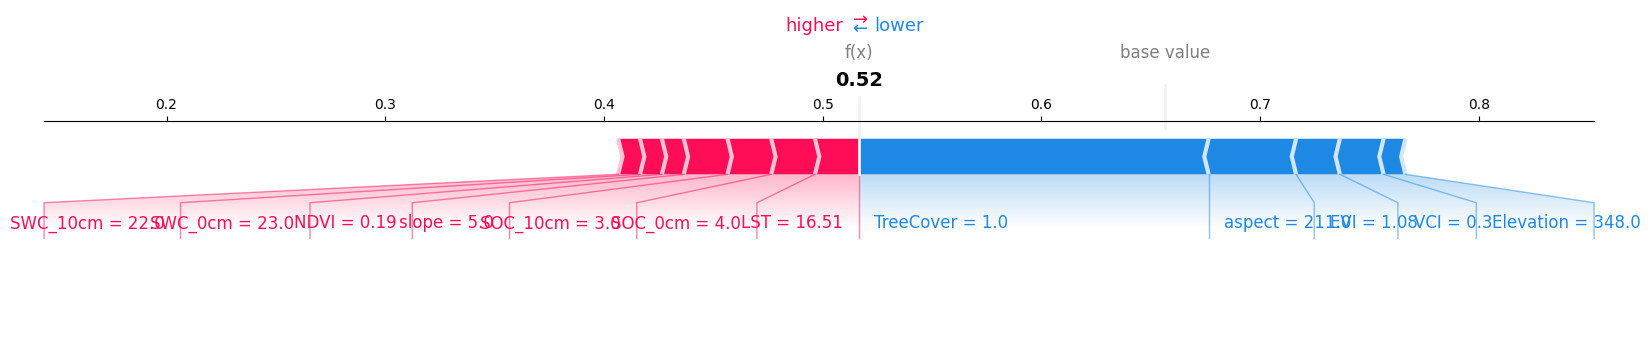

📌 Force plot saved: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/SHAP_ForcePlots_Forest/shap_force_plot_sample_3.png


<Figure size 640x480 with 0 Axes>

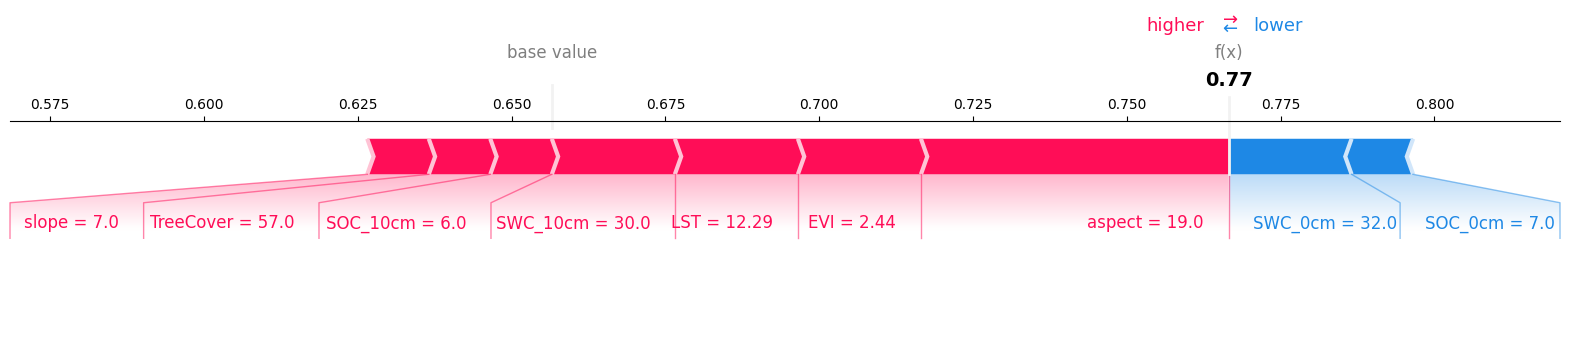

📌 Force plot saved: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/SHAP_ForcePlots_Forest/shap_force_plot_sample_4.png


<Figure size 640x480 with 0 Axes>

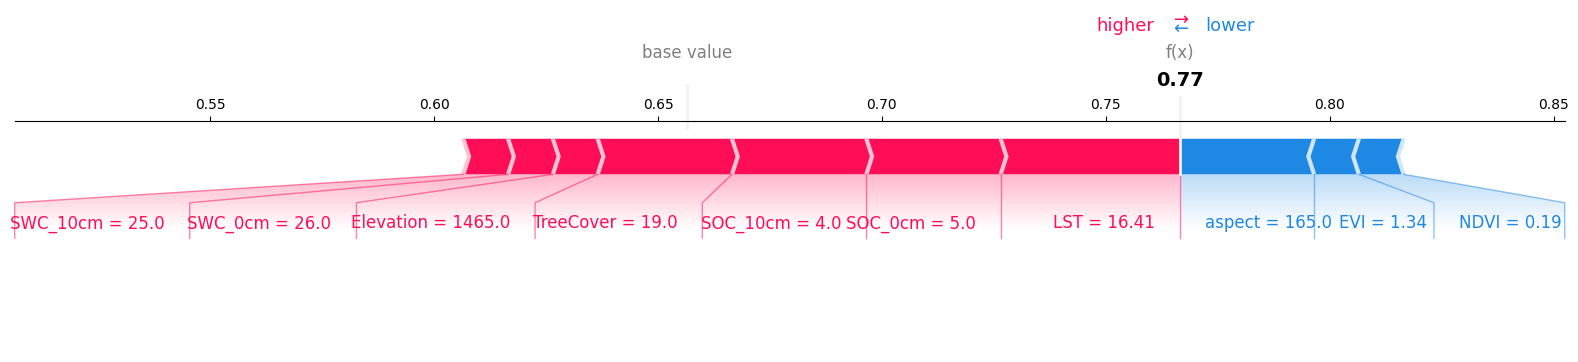

📌 Force plot saved: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/SHAP_ForcePlots_Forest/shap_force_plot_sample_5.png


In [11]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import os


# 1. Load training data
df = pd.read_csv("/content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Performance Data/FireRisk_Training_Samples_forest.csv")
df = df.drop(columns=['system:index', '.geo'], errors='ignore')

# 2. Split features and labels
X = df.drop(columns=['class'])
y = df['class']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Use SHAP TreeExplainer (faster & optimized for RF)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)  # list of arrays: [class0, class1]

# Confirm shape
print(f"✅ SHAP shape: {np.array(shap_values).shape}")  # Should be (2, n_samples, n_features)
print(f"✅ X_test shape: {X_test.shape}")

# Select SHAP values for class 1 (Fire)
shap_class1 = shap_values[:, :, 1]  # Shape (116, 15)

# Now plot
shap.summary_plot(
    shap_class1,
    features=X_test,
    feature_names=X.columns,
    plot_type='bar',
    show=False
)


plt.title("SHAP Feature Importance (Bar) - Random Forest")
plt.tight_layout()
bar_path = r"/content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/shap_feature_importance_bar_RF_Forest.png"
plt.savefig(bar_path, dpi=300)
plt.close()
print(f"📊 SHAP bar plot saved to: {bar_path}")

# ✅ Save SHAP feature importance to CSV
mean_abs_shap = pd.DataFrame({
    "Feature": X.columns,
    "Mean_Abs_SHAP": np.abs(shap_class1).mean(axis=0)
}).sort_values(by="Mean_Abs_SHAP", ascending=False)

csv_path = r"/content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/shap_feature_importance_RF_Forest.csv"
mean_abs_shap.to_csv(csv_path, index=False)
print(f"✅ SHAP feature importance saved to: {csv_path}")

import matplotlib.pyplot as plt

# ✅ Optional summary plot (Bee Swarm)
# Directly render it (to visually check in notebook)
shap.summary_plot(
    shap_class1,
    features=X_test,
    feature_names=X.columns
)

# ✅ Save SHAP summary plot as PNG
# shap.summary_plot must be called with show=False
shap.summary_plot(
    shap_class1,
    features=X_test,
    feature_names=X.columns,
    show=False  # ✅ This is crucial for saving
)

# Now save the currently active SHAP figure
plt.gcf().savefig(
    "/content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/shap_summary_plot_forest.png",
    bbox_inches='tight',
    dpi=300
)
plt.close()

print("🐝 SHAP summary plot saved successfully!")


# === SHAP Force Plots (Top 5 Samples) ===
force_dir = r"/content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Forest/SHAP_ForcePlots_Forest"
os.makedirs(force_dir, exist_ok=True)

for i in range(5):
    plt.figure()
    shap.force_plot(
        explainer.expected_value[1],
        np.round(shap_class1[i, :], 2),       # ✅ SHAP values rounded to 2 decimals
        np.round(X_test.iloc[i, :], 2),       # ✅ Feature values rounded to 2 decimals
        feature_names=X.columns,
        matplotlib=True
    )
    plt.title(f"SHAP Force Plot - Sample {i+1}")
    plt.tight_layout()
    force_path = os.path.join(force_dir, f"shap_force_plot_sample_{i+1}.png")
    plt.savefig(force_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"📌 Force plot saved: {force_path}")

In [12]:
#Grassland

✅ SHAP shape: (686, 15, 2)
✅ X_test shape: (686, 15)
📊 SHAP bar plot saved to: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/shap_feature_importance_bar_RF_Grassland.png
✅ SHAP feature importance saved to: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/shap_feature_importance_RF_Grassland.csv


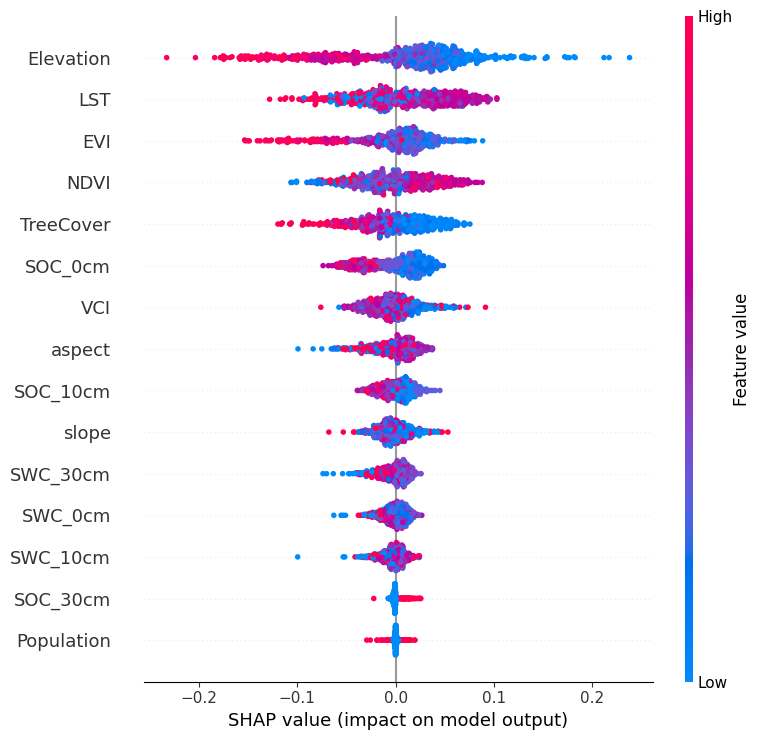

🐝 SHAP summary plot saved successfully!


<Figure size 640x480 with 0 Axes>

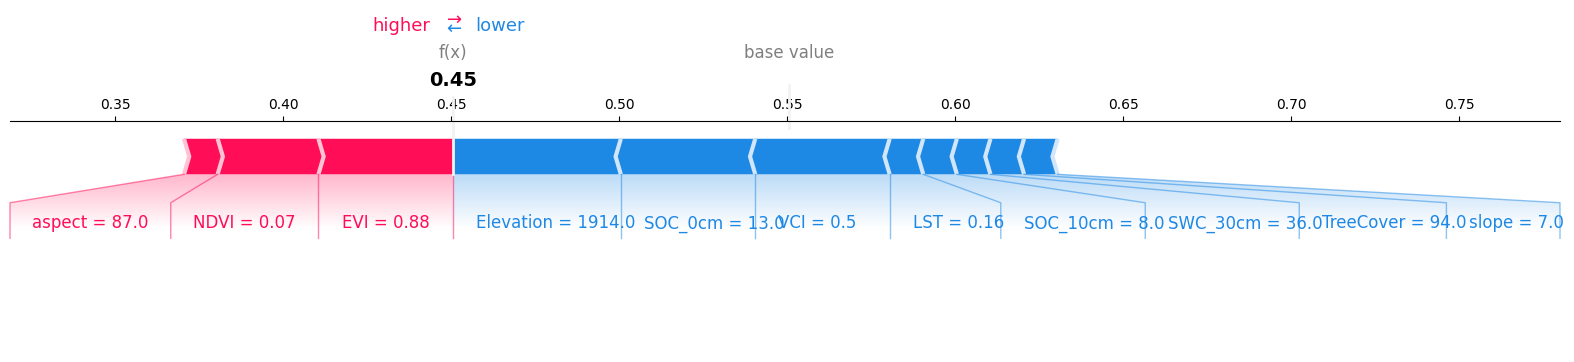

📌 Force plot saved: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/SHAP_ForcePlots_Grassland/shap_force_plot_sample_1.png


<Figure size 640x480 with 0 Axes>

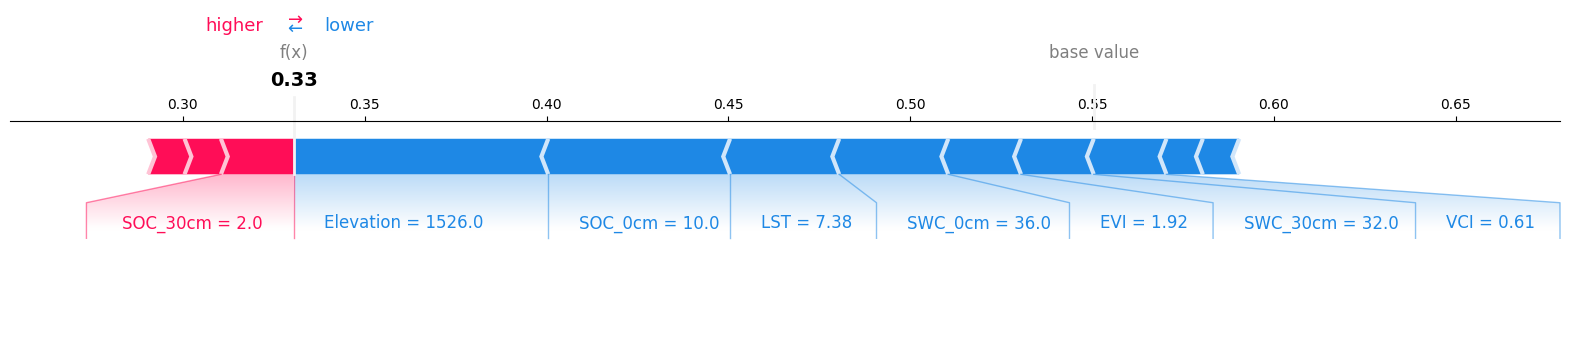

📌 Force plot saved: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/SHAP_ForcePlots_Grassland/shap_force_plot_sample_2.png


<Figure size 640x480 with 0 Axes>

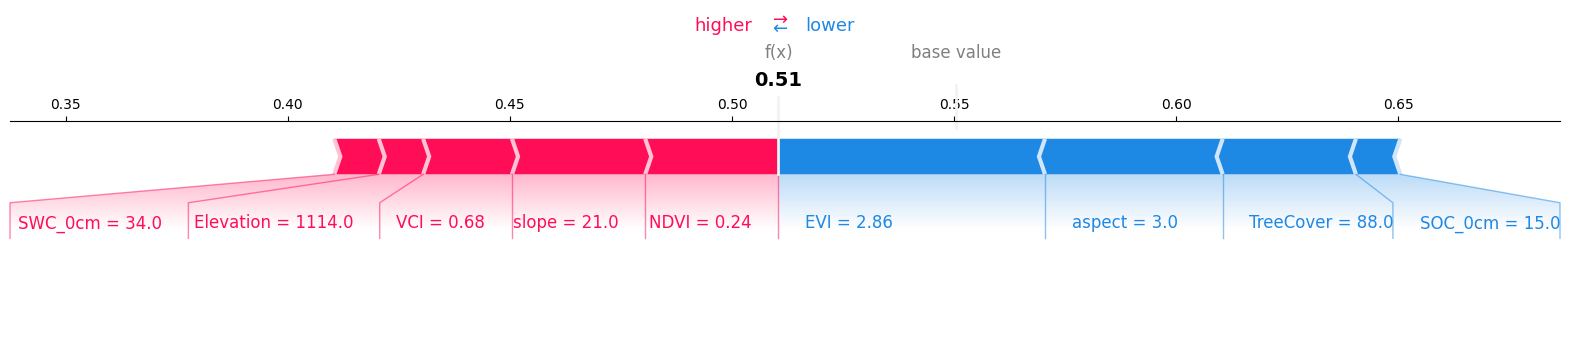

📌 Force plot saved: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/SHAP_ForcePlots_Grassland/shap_force_plot_sample_3.png


<Figure size 640x480 with 0 Axes>

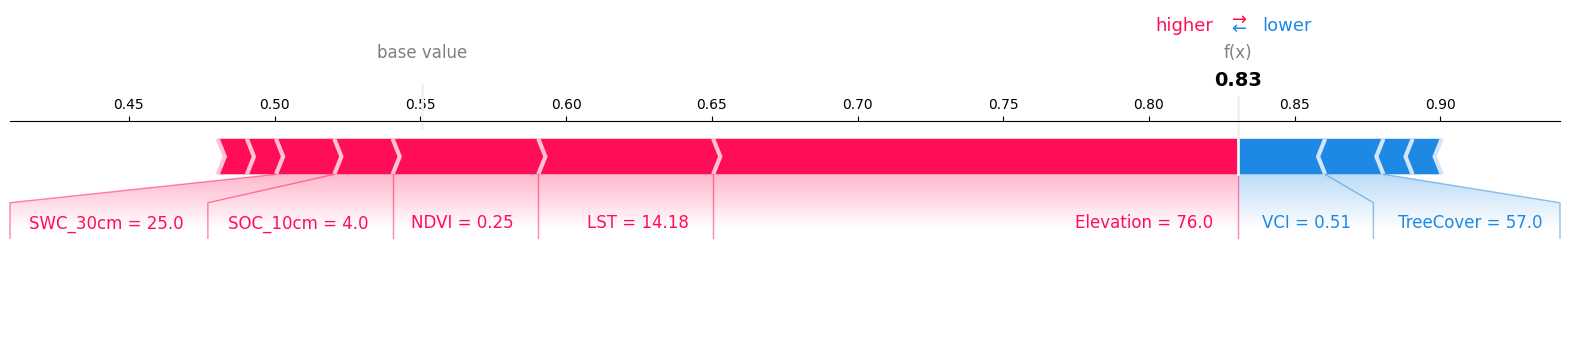

📌 Force plot saved: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/SHAP_ForcePlots_Grassland/shap_force_plot_sample_4.png


<Figure size 640x480 with 0 Axes>

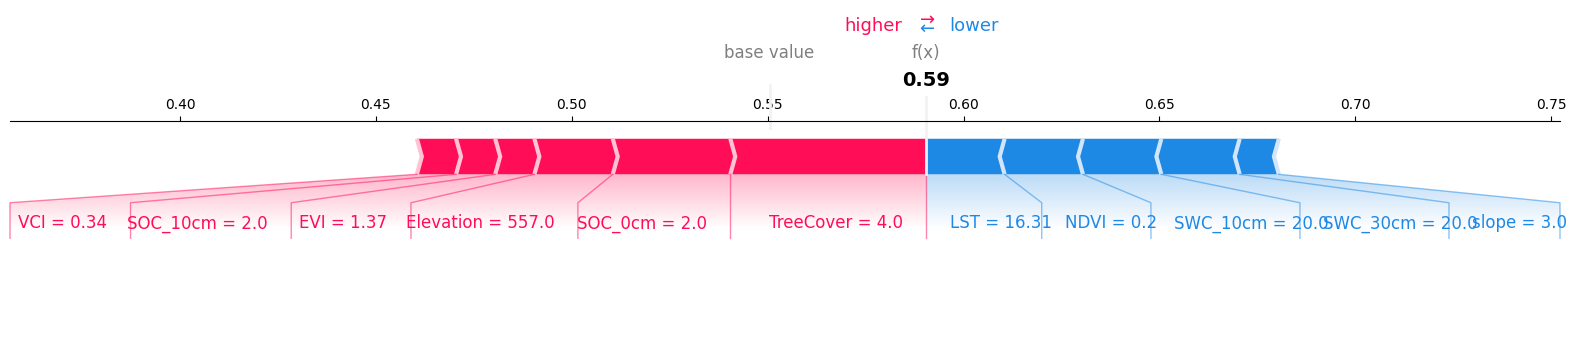

📌 Force plot saved: /content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/SHAP_ForcePlots_Grassland/shap_force_plot_sample_5.png


In [13]:
# 1. Load training data
df = pd.read_csv("/content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Performance Data/FireRisk_Training_Samples_grassland.csv")
df = df.drop(columns=['system:index', '.geo'], errors='ignore')

# 2. Split features and labels
X = df.drop(columns=['class'])
y = df['class']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Use SHAP TreeExplainer (faster & optimized for RF)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)  # list of arrays: [class0, class1]

# Confirm shape
print(f"✅ SHAP shape: {np.array(shap_values).shape}")  # Should be (2, n_samples, n_features)
print(f"✅ X_test shape: {X_test.shape}")

# Select SHAP values for class 1 (Fire)
shap_class1 = shap_values[:, :, 1]  # Shape (116, 15)

# Now plot
shap.summary_plot(
    shap_class1,
    features=X_test,
    feature_names=X.columns,
    plot_type='bar',
    show=False
)


plt.title("SHAP Feature Importance (Bar) - Random Forest")
plt.tight_layout()
bar_path = r"/content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/shap_feature_importance_bar_RF_Grassland.png"
plt.savefig(bar_path, dpi=300)
plt.close()
print(f"📊 SHAP bar plot saved to: {bar_path}")

# ✅ Save SHAP feature importance to CSV
mean_abs_shap = pd.DataFrame({
    "Feature": X.columns,
    "Mean_Abs_SHAP": np.abs(shap_class1).mean(axis=0)
}).sort_values(by="Mean_Abs_SHAP", ascending=False)

csv_path = r"/content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/shap_feature_importance_RF_Grassland.csv"
mean_abs_shap.to_csv(csv_path, index=False)
print(f"✅ SHAP feature importance saved to: {csv_path}")

import matplotlib.pyplot as plt

# ✅ Optional summary plot (Bee Swarm)
# Directly render it (to visually check in notebook)
shap.summary_plot(
    shap_class1,
    features=X_test,
    feature_names=X.columns
)

# ✅ Save SHAP summary plot as PNG
# shap.summary_plot must be called with show=False
shap.summary_plot(
    shap_class1,
    features=X_test,
    feature_names=X.columns,
    show=False  # ✅ This is crucial for saving
)

# Now save the currently active SHAP figure
plt.gcf().savefig(
    "/content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/shap_summary_plot_Grassland.png",
    bbox_inches='tight',
    dpi=300
)
plt.close()

print("🐝 SHAP summary plot saved successfully!")


# === SHAP Force Plots (Top 5 Samples) ===
force_dir = r"/content/drive/MyDrive/California_Fire_MS/Fire_Risk_RF_Model_Performance/Result_SHAP_Grassland/SHAP_ForcePlots_Grassland"
os.makedirs(force_dir, exist_ok=True)

for i in range(5):
    plt.figure()
    shap.force_plot(
        explainer.expected_value[1],
        np.round(shap_class1[i, :], 2),       # ✅ SHAP values rounded to 2 decimals
        np.round(X_test.iloc[i, :], 2),       # ✅ Feature values rounded to 2 decimals
        feature_names=X.columns,
        matplotlib=True
    )
    plt.title(f"SHAP Force Plot - Sample {i+1}")
    plt.tight_layout()
    force_path = os.path.join(force_dir, f"shap_force_plot_sample_{i+1}.png")
    plt.savefig(force_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"📌 Force plot saved: {force_path}")